# Lab 1. Introduction to Machine learning

In this Lab we will firstly see a simple example of a classification problem.

Afterwards, we will focus on three different questions related to ML:


1) Learn how to use a sklearn to solve ML tasks (classification and regression)

2) Illustrate important concepts in ML (imputation, validation, standarization, etc.) 

3) Learn how to create sophisticated ML pipelines for real-world problems



We will use material from the books:

- "Hands-On Machine Learning with Scikit-Learn and TensorFlow. Concepts, Tools, and Techniques to Build Intelligent Systems" by Aurélien Géron. http://shop.oreilly.com/product/0636920052289.do 

- "Deep Learning with Python" by F. Chollet. https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438

which are recommended as Bibliography of the course.


In [1]:
# We start by importing the python libraries required to solve the problems

import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.patches as mpatches

# Enables interaction with the plots
%matplotlib notebook

# These are modules contained in sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import ClassifierMixin

# Imputation methods
from sklearn.impute import SimpleImputer

# Methods for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import binarize

# Feature selection Methods
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA

# Methods for classifier validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics

# Datasets in sklearn
import sklearn.datasets as data_load

# Pipelines
from sklearn.pipeline import Pipeline

from tpot import TPOTClassifier

# Enables interactivity with the plots
%matplotlib notebook

In [2]:
# We create two sets of points (XA,yA)  and (XB,yB) corresponding to two different classes

number_points_Class_A = 50
number_points_Class_B = 50

# Font size
fsize = 20

# Points in Class A
xA = 20 * np.random.rand(number_points_Class_A)
shiftA = 20 * np.random.rand(number_points_Class_A)
yA = (4 + xA) / 2.0 - shiftA - 0.1

# Points in Class B
xB = 20 * np.random.rand(number_points_Class_B)
shiftB = 20 * np.random.rand(number_points_Class_B)
yB = (4 + xB) / 2.0 + shiftB + 0.1

<IPython.core.display.Javascript object>


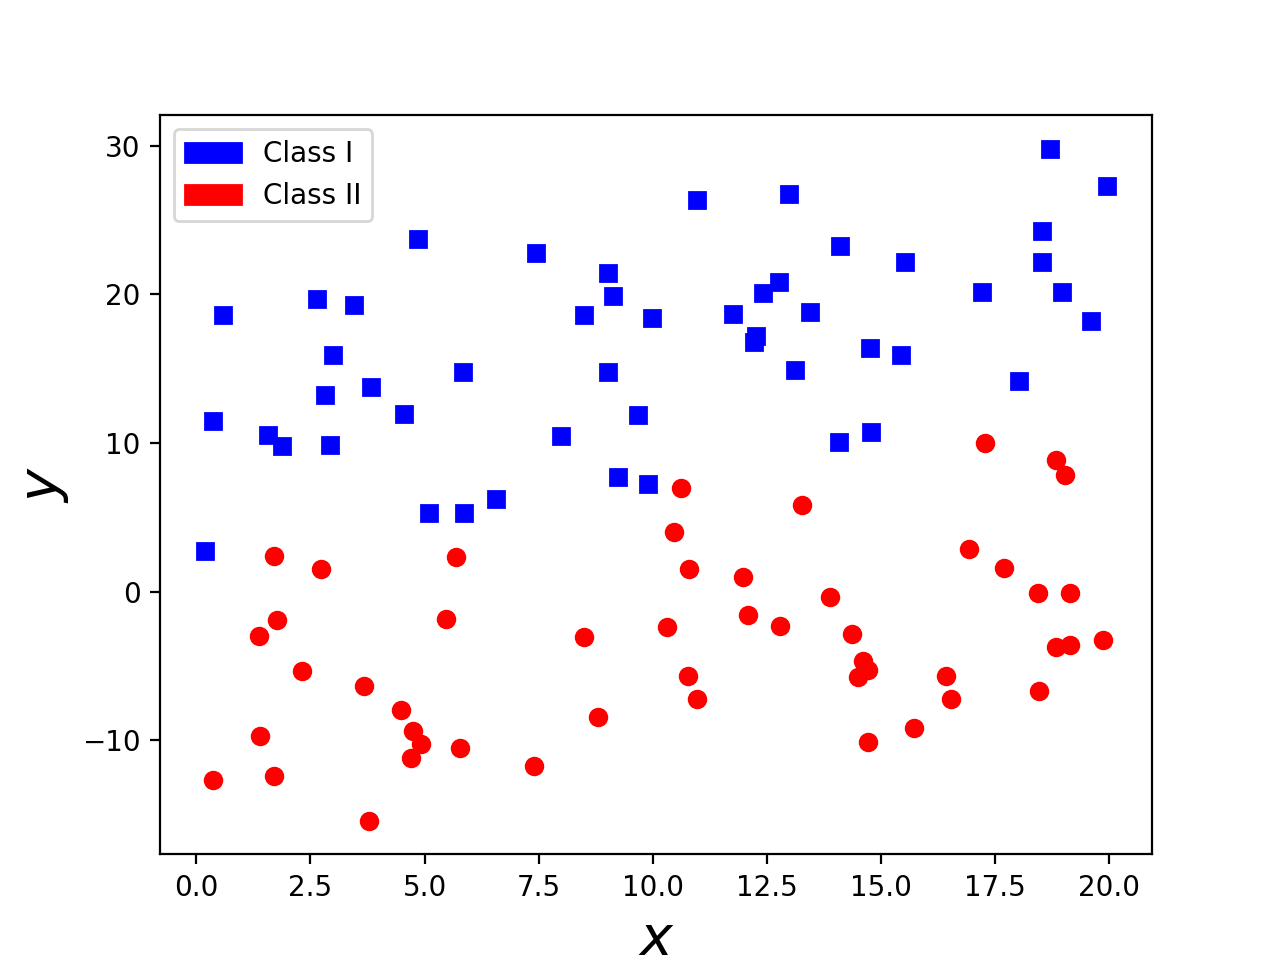

In [3]:
# The points in the two classes are visualized with different colors
# Points in Class I in blue. Points in Class II in red

plt.figure()
plt.plot(xA, yA, 'ro')
plt.plot(xB, yB, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()

<IPython.core.display.Javascript object>


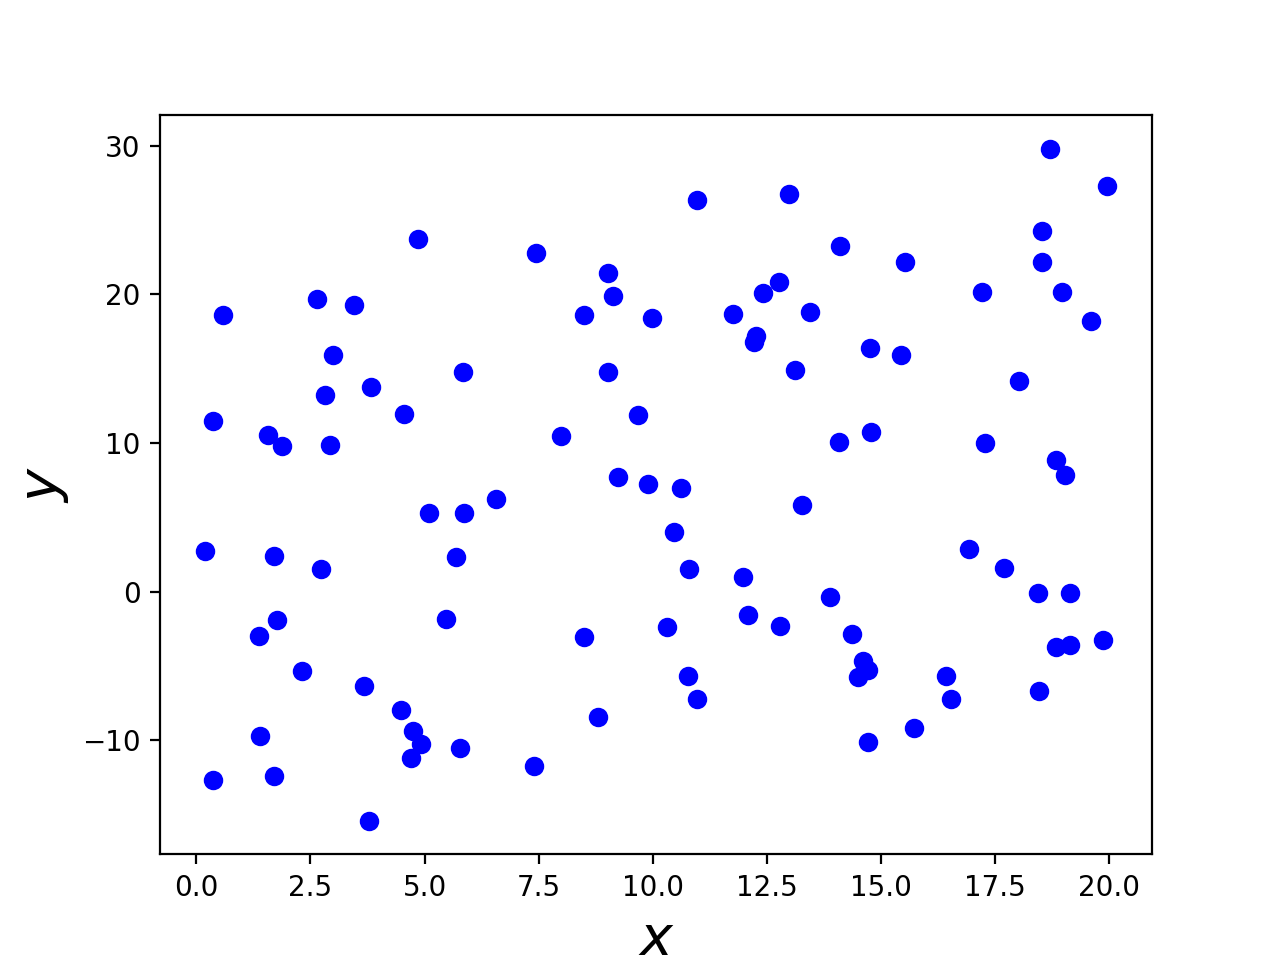

In [4]:
plt.figure()
plt.plot(xA, yA, 'bo')
plt.plot(xB, yB, 'bo')

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()

<IPython.core.display.Javascript object>


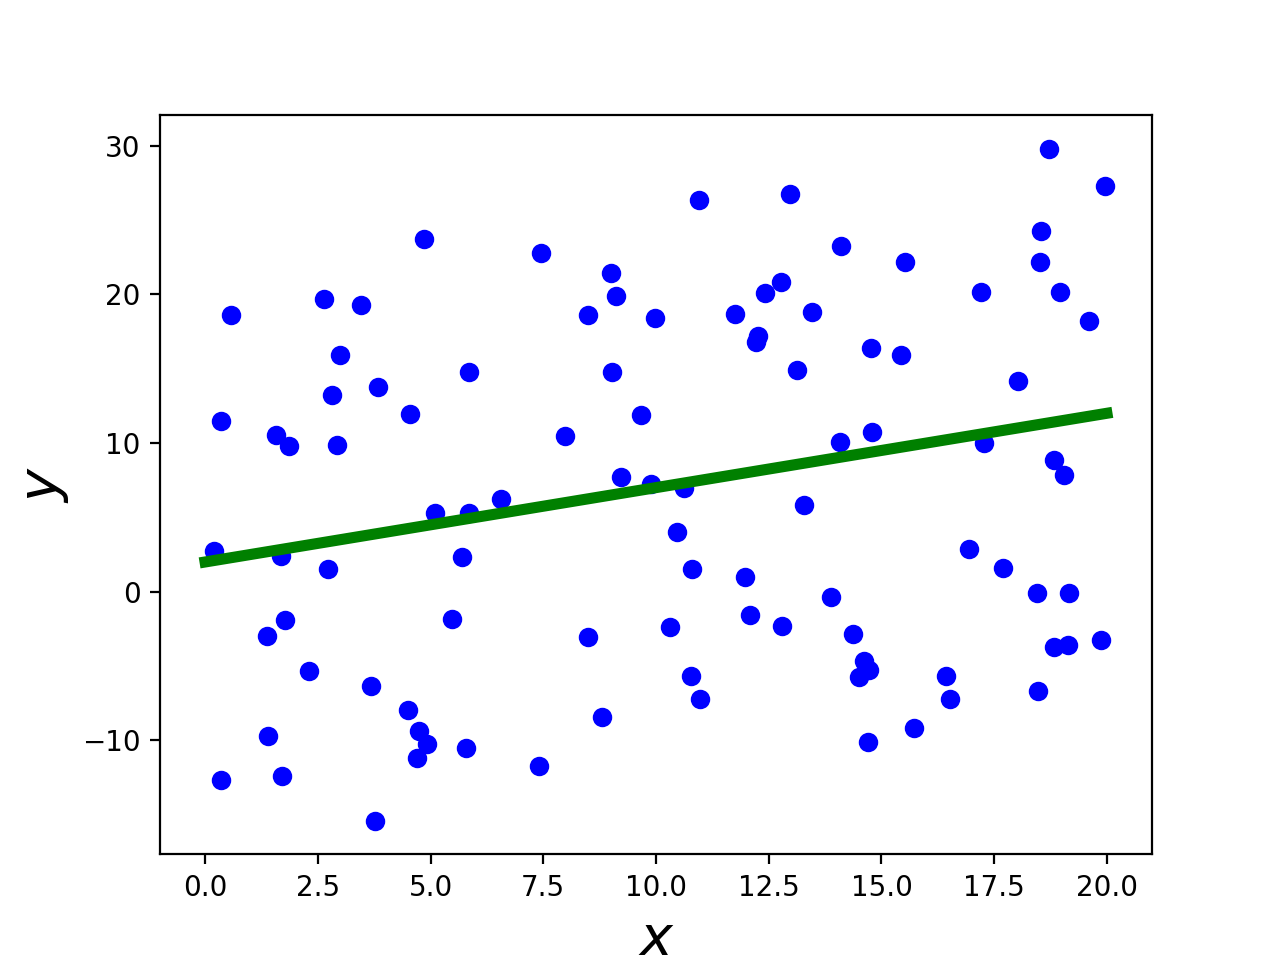

In [5]:
x1 = np.linspace(0, 20, 2000)
y1 = (4 + x1) / 2.0

plt.figure()
plt.plot(xA, yA, 'bo')
plt.plot(xB, yB, 'bo')

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.plot(x1, y1, 'g', lw=4)

plt.show()

<IPython.core.display.Javascript object>


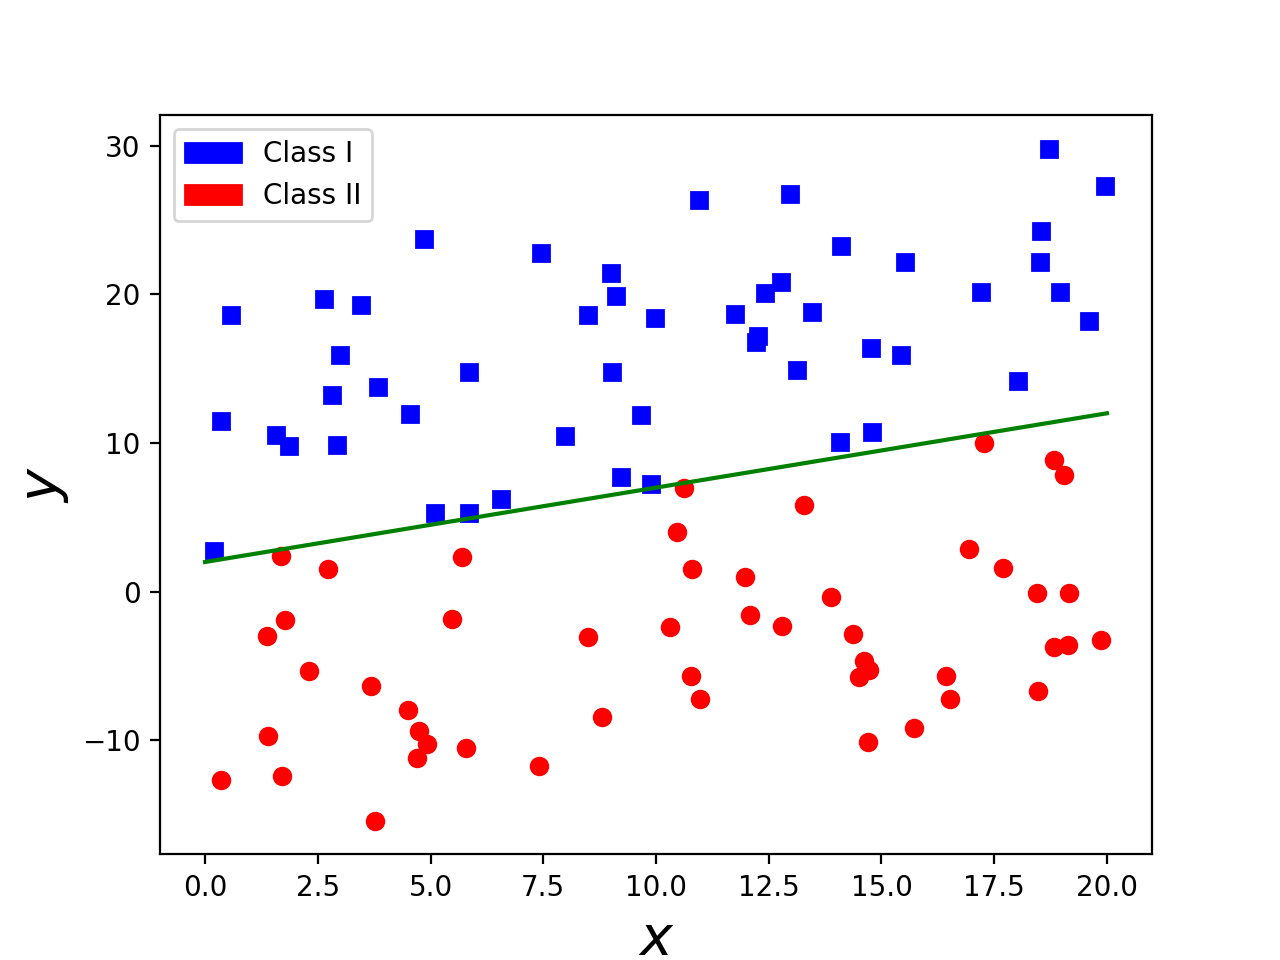

In [6]:
# We show that there exists a hyperplane that allows to perfectly divide
# points in the two classes.
# In 2-d this hyperplane corresponds to a line that is represented in green.

x1 = np.linspace(0, 20, 2000)
y1 = (4 + x1) / 2.0

plt.figure()

plt.plot(xA, yA, 'ro')
plt.plot(xB, yB, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

# Show hyperplane dividing the classes
plt.plot(x1, y1, 'g')
plt.show()

In [7]:
# Now we create a more difficult classification problem
# where the two region classes overlap.

# Font size
fsize = 20

# Points in Class A
xA1 = 20 * np.random.rand(number_points_Class_A)
shiftA1 = 20 * np.random.rand(number_points_Class_A)
yA1 = (4 + xA1) / 2.0 - shiftA1 + 5.0

# Points in Class B
xB1 = 20 * np.random.rand(number_points_Class_B)
shiftB1 = 20 * np.random.rand(number_points_Class_B)
yB1 = (4 + xB1) / 2.0 + shiftB1 - 5.0

# Hyperplane dividing the two classes
x1 = np.linspace(0, 20, 2000)
y1 = (4 + x1) / 2.0

<IPython.core.display.Javascript object>


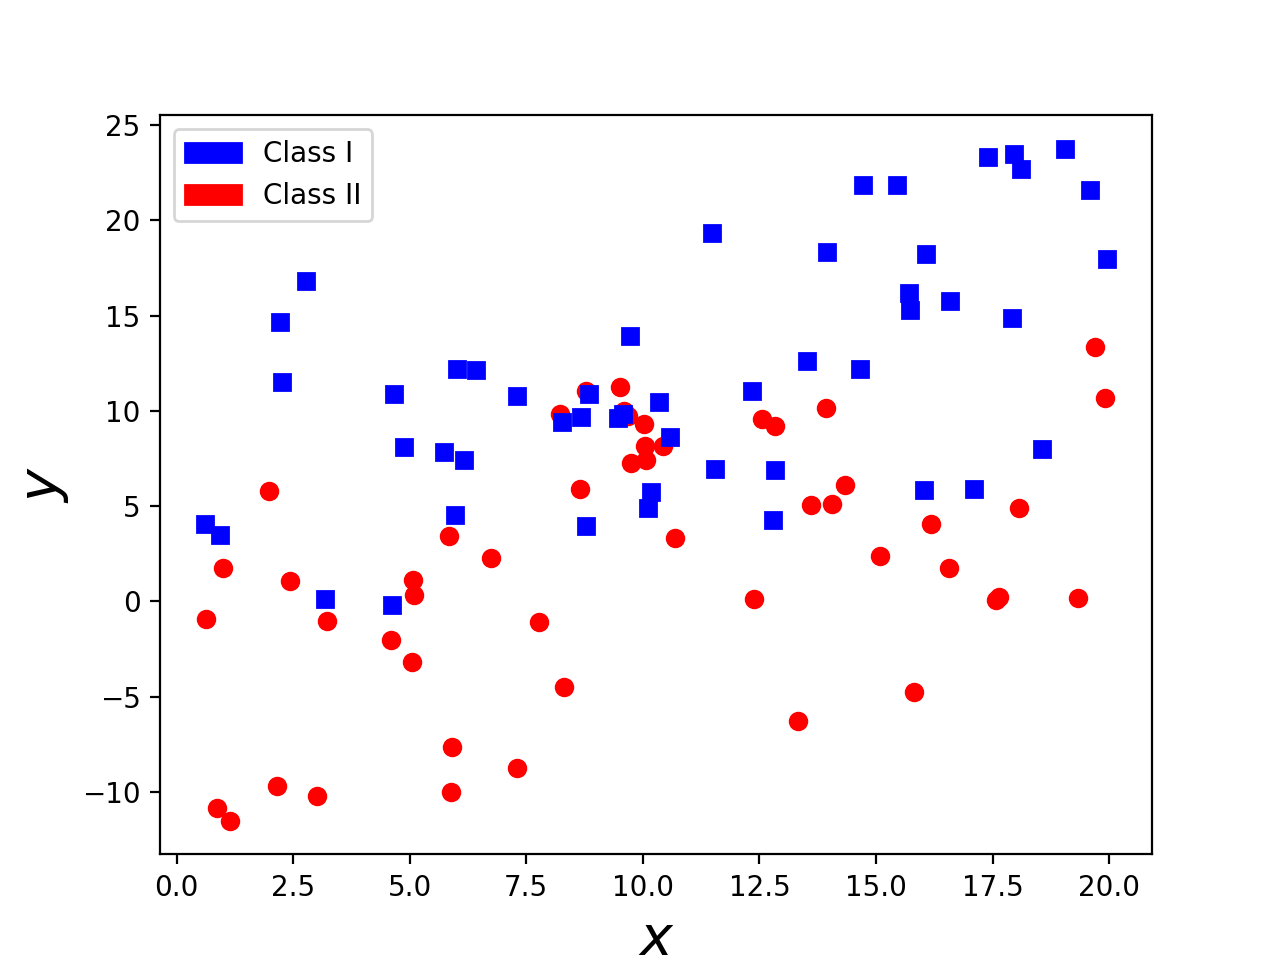

Text(0, 0.5, '$y$')

In [8]:
# The points corresponding to the two classes are plotted

plt.figure()

plt.plot(xA1, yA1, 'ro')
plt.plot(xB1, yB1, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

<IPython.core.display.Javascript object>


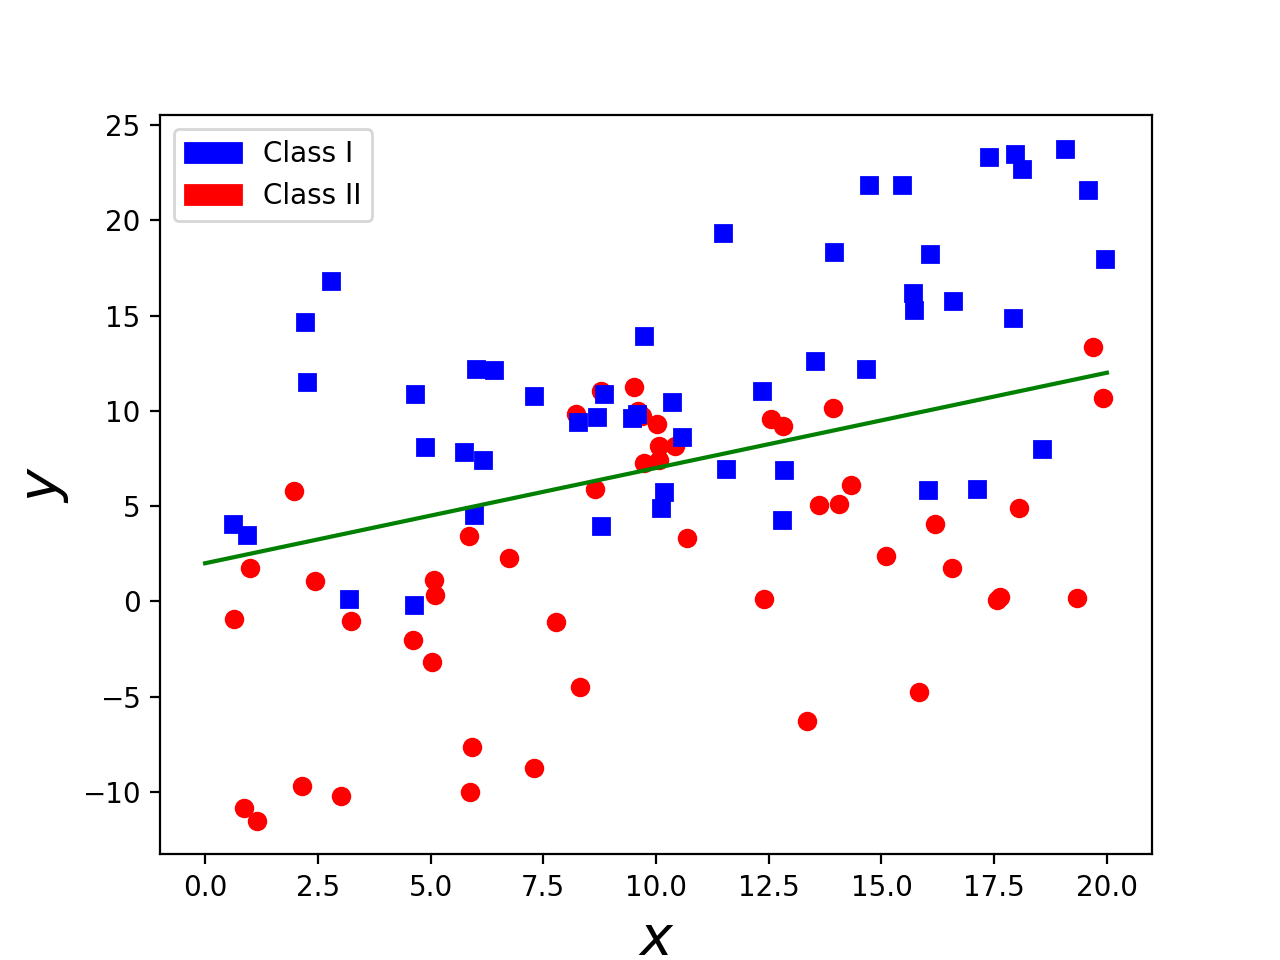

In [9]:
# We use the same hyperplane to divide points from the two classes
# However, as it can be appreciated, the classification provided by this hyperplane
# is not perfect

plt.figure()

plt.plot(xA1, yA1, 'ro')
plt.plot(xB1, yB1, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

# Show hyperplane dividing the classes
plt.plot(x1, y1, 'g')
plt.show()

In [10]:
# Now we create a more difficult classification problem
# where the two region classes seem to overlap and where
# it is not evident that a linear separator exists.

# Font size
fsize = 20

# Points in Class A
xA2 = 20 * np.random.rand(number_points_Class_A)
shiftA2 = 20 * np.random.rand(number_points_Class_A)
yA2 = 20 * np.cos(0.2 * np.pi * xA2) - shiftA2

# Points in Class B
xB2 = 20 * np.random.rand(number_points_Class_B)
shiftB2 = 20 * np.random.rand(number_points_Class_B)
yB2 = 20 * np.cos(0.2 * np.pi * xB2) + shiftB2

# Sinusoidal curve dividing the two classes
x2 = np.linspace(0, 20, 2000)
y2 = 20 * np.cos(0.2 * np.pi * x2)

<IPython.core.display.Javascript object>


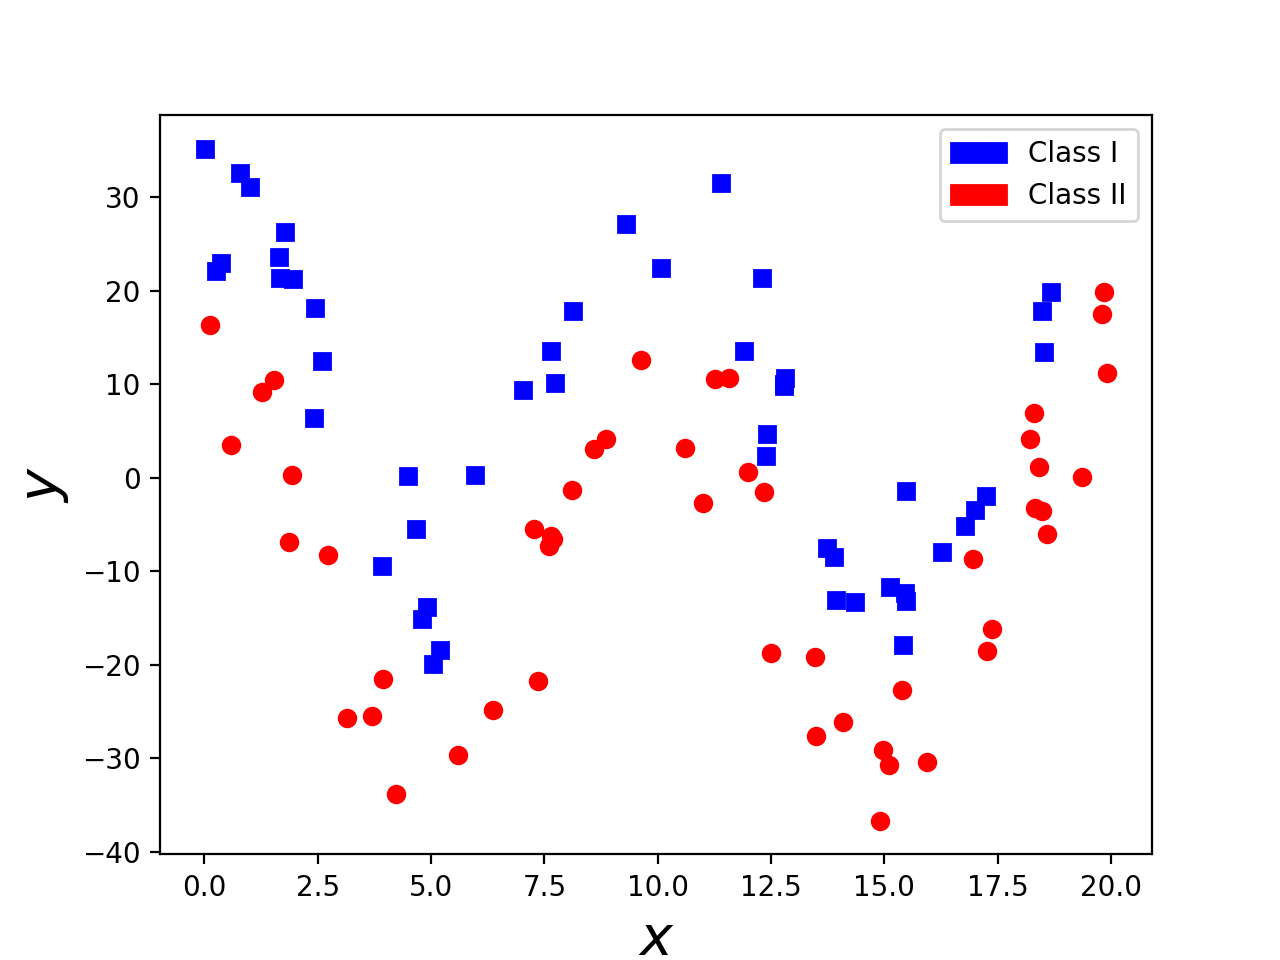

Text(0, 0.5, '$y$')

In [11]:
# The points corresponding to the two classes are plotted

plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

<IPython.core.display.Javascript object>


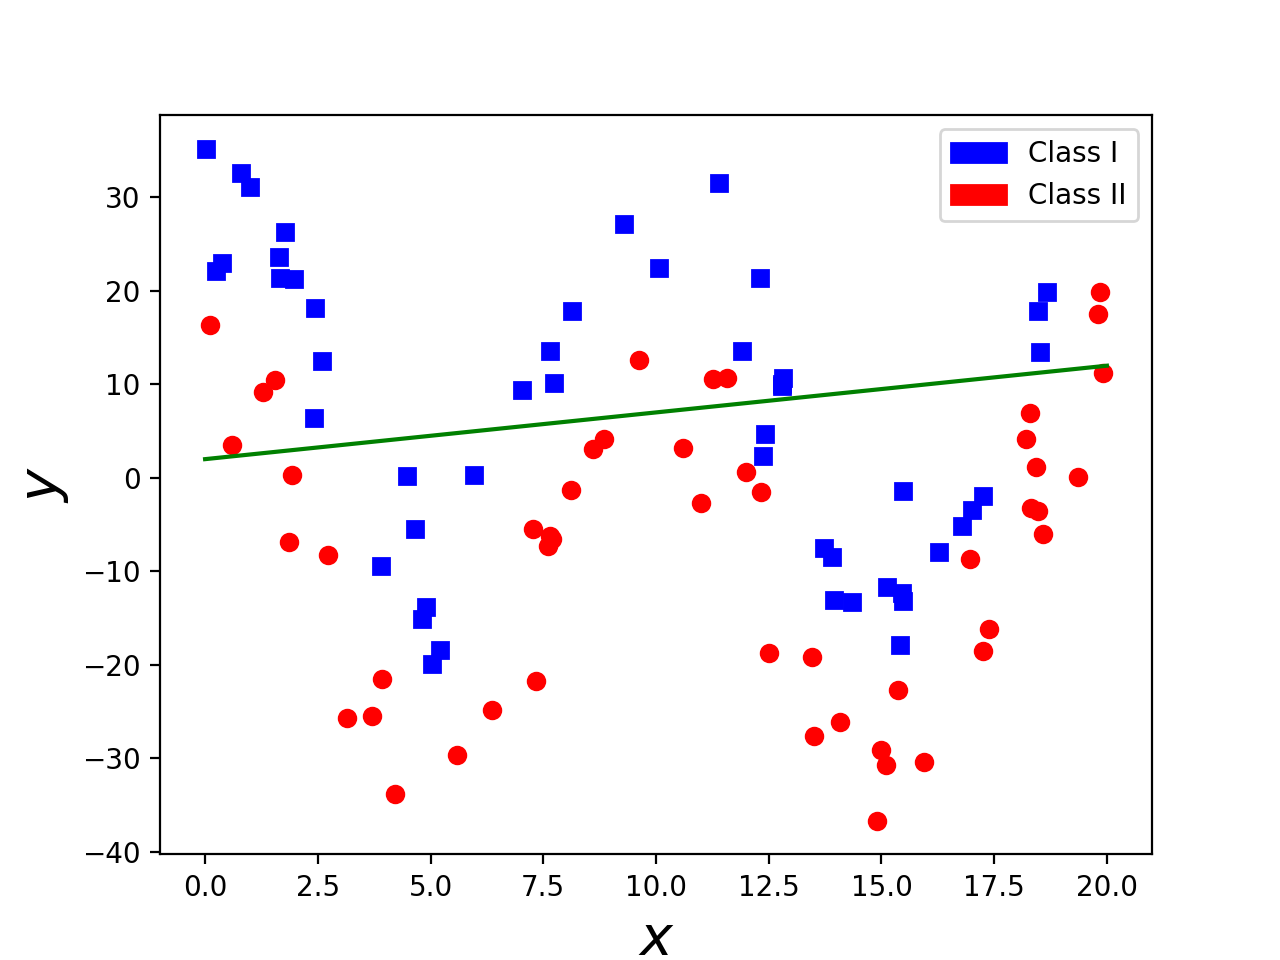

In [12]:
# Now we plot in green the same line that was previously used to classify the previous data
# It can be seen that it does not provide a good separation of the data

plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

# Show the hyperplane previously computed  dividing the classes
plt.plot(x1, y1, 'g')
plt.show()

<IPython.core.display.Javascript object>


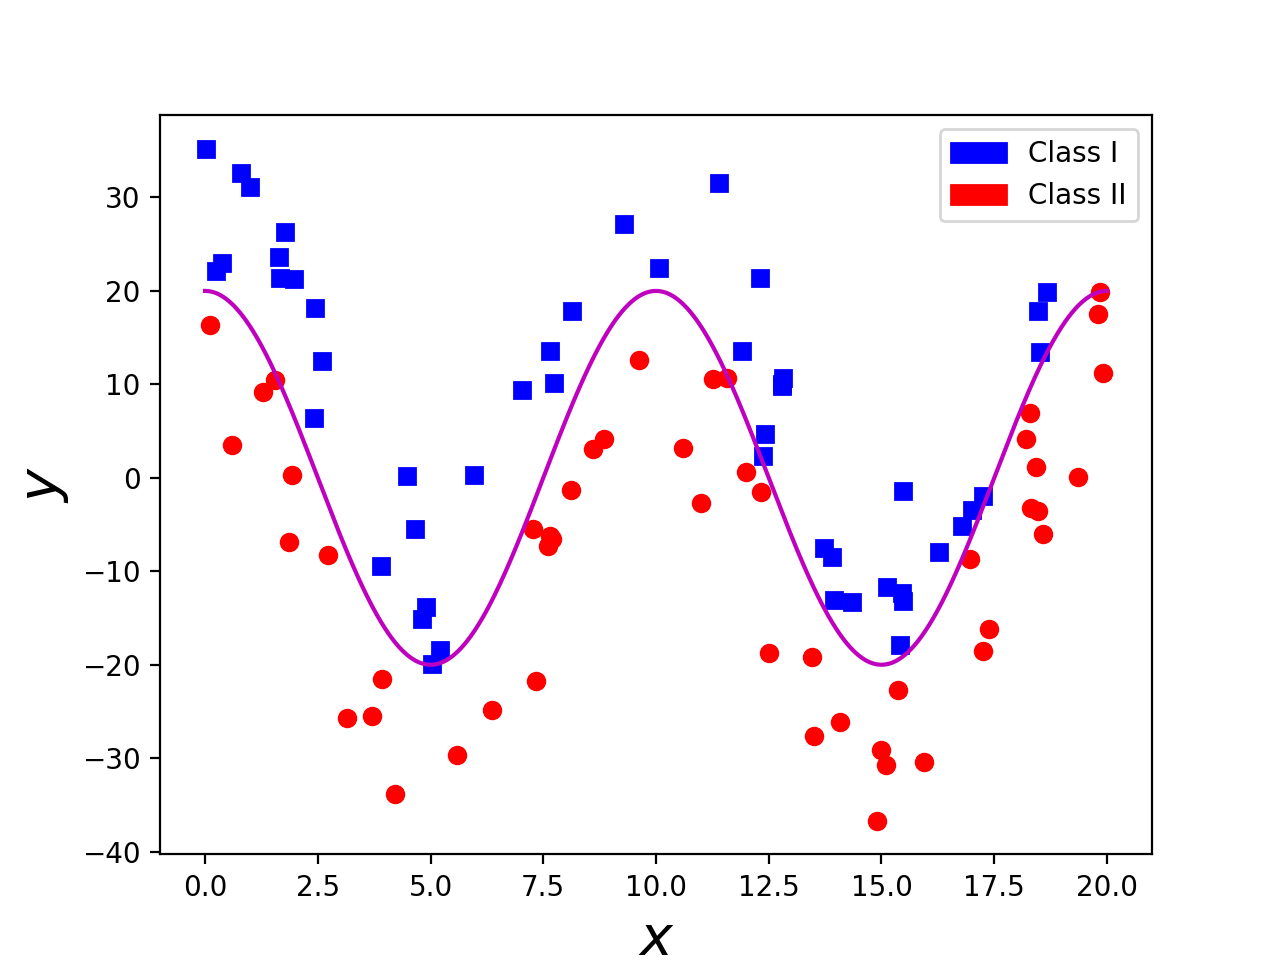

In [13]:
# Finally we also show a curve that makes a perfect separation of the data

plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

# Show the curve dividing the classes
plt.plot(x2, y2, 'm')
plt.show()

### A very simple binary classification problem 
For our first classification problem, we will take the initial, easy problem back. As previously, we can divide create a perfect classifier by using a hyperplane (a line).

<IPython.core.display.Javascript object>


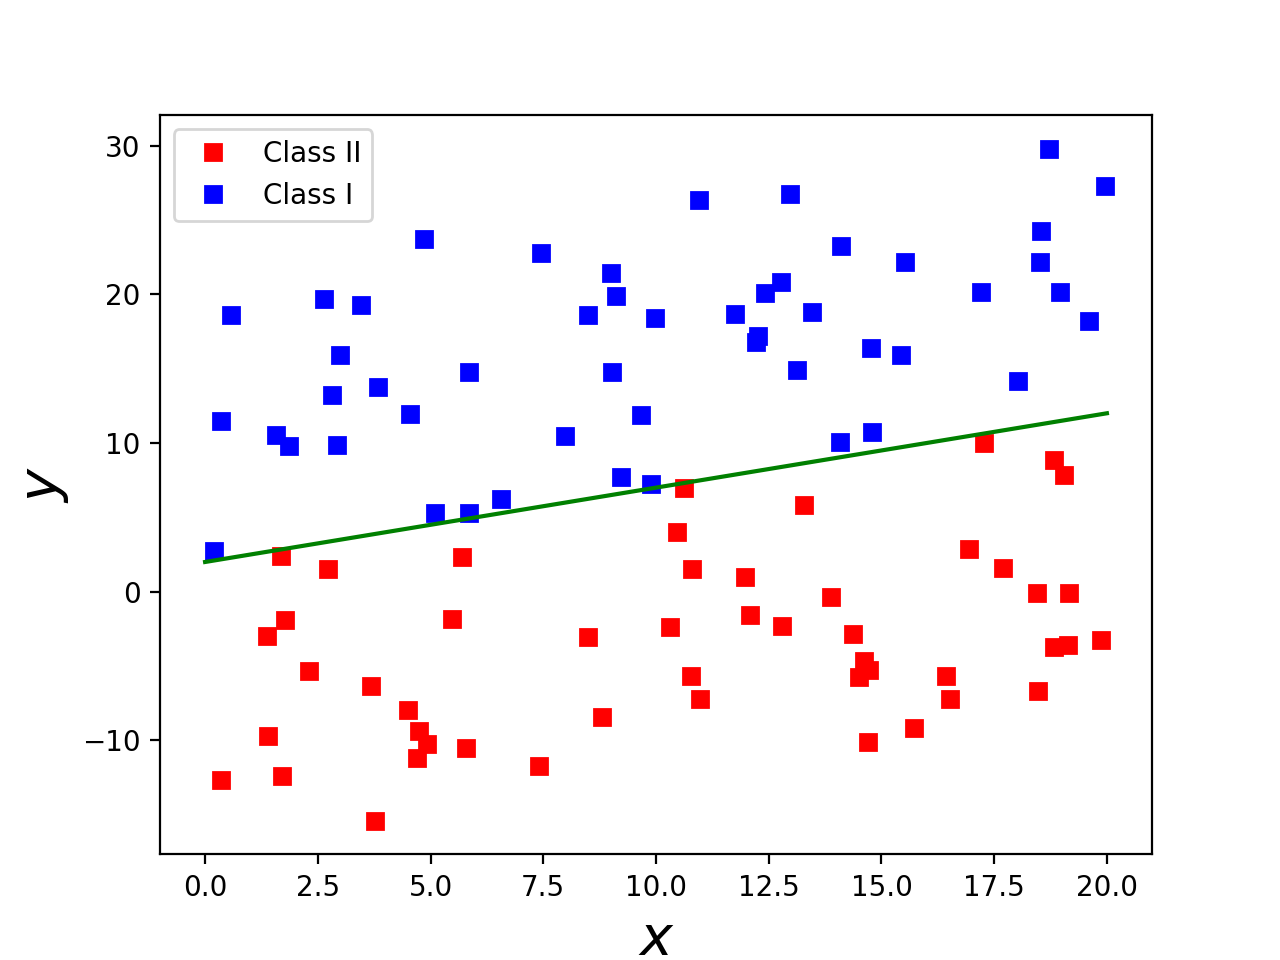

In [14]:
# In 2-d this hyperplane corresponds to a line that is represented in green.

plt.figure()

plt.plot(xA, yA, 'rs', label="Class II")
plt.plot(xB, yB, 'bs', label="Class I")

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.legend()

# Show hyperplane dividing the classes
plt.plot(x1, y1, 'g')
plt.show()

## Learning simple classifiers using sklearn

### The common syntax for learning a classifier in sklearn implies three steps: 

- Declaration of the classifier
- Fitting the classifier from the data and the labels
- Using the classifier to predict new data

In the example below we learn a logistic regression classifier that separates the two classes presented above.

First, we will create the training data that is needed since we are working with a supervised classification algorithm. By uncommenting the "print" line you can check the size of the training data. 

In [15]:
# We define the labels for our two classes A and B. Variable c will keep the
# labels of all points.
# The points in Class A will have label 1 assigned and the points in Class B,
# will have label 0.

c = np.hstack((np.ones((number_points_Class_A)),
               np.zeros((number_points_Class_B))))
#print(c.shape)

# We create the training data concatenating examples from the two classes XA and XB
training_data = np.hstack((np.vstack((xA, yA)), np.vstack((xB,
                                                           yB)))).transpose()
#print(training_data.shape)

In [16]:
training_data.shape

(100, 2)

We declare the classifier (it is a logistic regression classifier)

In [17]:
lr = LogisticRegression()

In [18]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We learn the classifier. In sklearn this is done using the function fit(data,classes)
It will update the "lr" model using the data from training_data and the labels

In [19]:
lr.fit(training_data,c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Finally, we use the logistic regression classifier lr to predict the classes of the dataset. In the example below we predict the classes of the same dataset used for training (training_data) but this is not a realistic case. Usually we predict the classes of data that was not used for training (called the test data). 

In [20]:
# Predictions of the classifier on the training data
prediction_training = lr.predict(training_data)

In [21]:
prediction_training

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

###  Visualization of the predictions given by the classifier

A classifier is accurate if for most of the points the class predicted coincide with the real classes. In this sense, for a binary problem, each prediction can be of four types:

1) true positive: A positive point is given positive prediction

2) false positive:  A negative point is given positive prediction

3) true negative: A negative point is given negative prediction

4) false negative:  A positive point is given  negative prediction

Below, we put each classifier prediction in one of the four groups


<IPython.core.display.Javascript object>


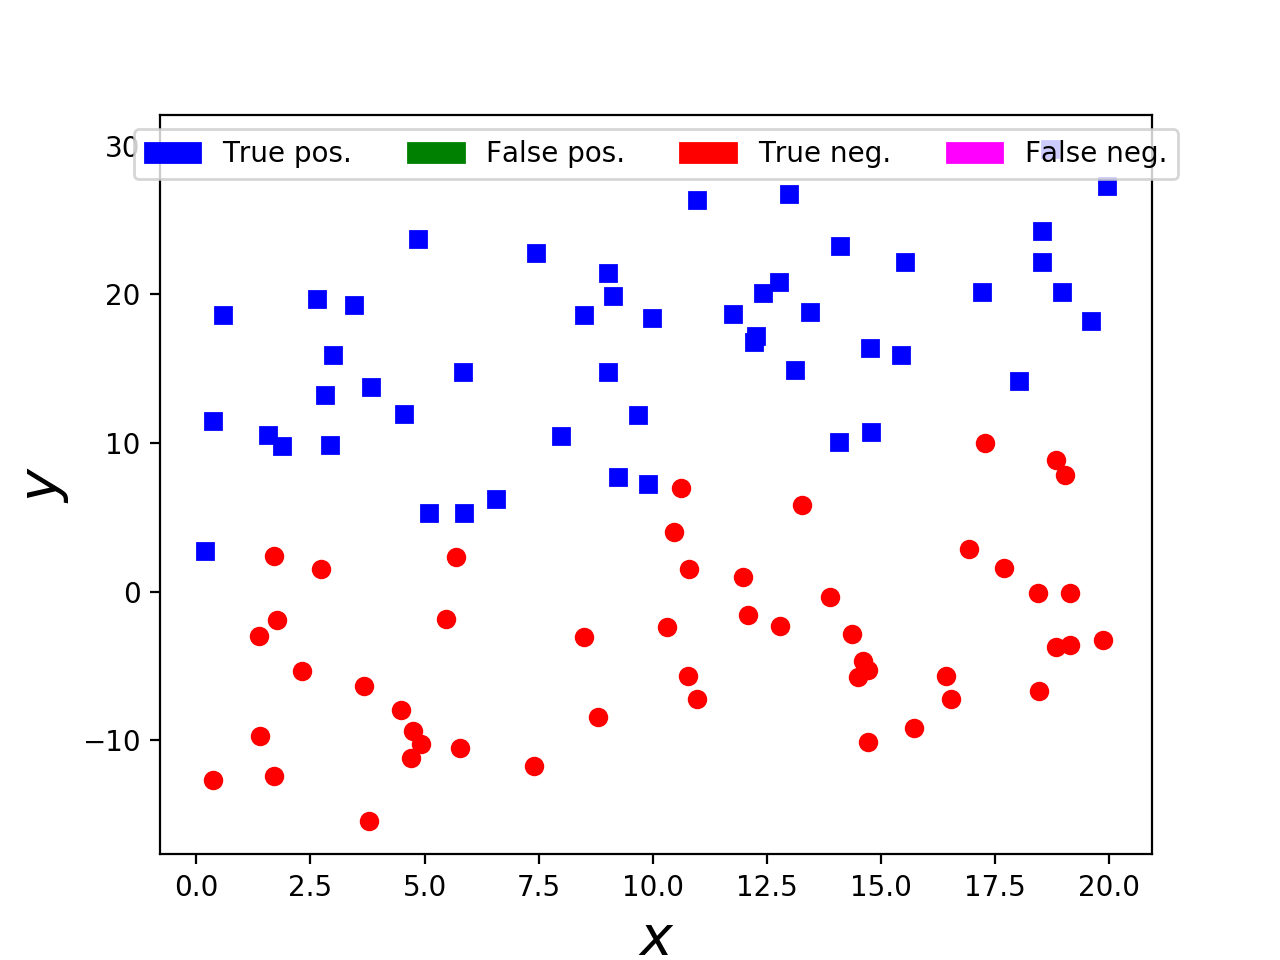

In [31]:
# Font size
fsize = 20

# We identify the points that were correctly and wrongly classified
true_positive = np.where(prediction_training[:number_points_Class_A] == 1)[0]
false_positive = np.where(prediction_training[:number_points_Class_A] == 0)[0]
true_negative = number_points_Class_A + np.where(
    prediction_training[number_points_Class_A:] == 0)[0]
false_negative = number_points_Class_A + np.where(
    prediction_training[number_points_Class_A:] == 1)[0]

# Points are shown in different colors according to classification
plt.figure()
plt.plot(training_data[true_positive, 0], training_data[true_positive, 1],
         'ro')
plt.plot(training_data[false_positive, 0], training_data[false_positive, 1],
         'go')
plt.plot(training_data[true_negative, 0], training_data[true_negative, 1],
         'bs')
plt.plot(training_data[false_negative, 0], training_data[false_negative, 1],
         'ms')

blue_patch = mpatches.Patch(color='blue', label='True pos.')
green_patch = mpatches.Patch(color='green', label='False pos.')
red_patch = mpatches.Patch(color='red', label='True neg.')
magenta_patch = mpatches.Patch(color='magenta', label='False neg.')

plt.legend(
    handles=[blue_patch, green_patch, red_patch, magenta_patch],
    #bbox_to_anchor=(0, 1),
    ncol=4,
    loc='upper center')

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()

### Exercise 1

Below we want to learn a k-nearest-neighbor classifier from the train_data and use it 
to predict the classes of the test data. The problem has two classes. The positive class
is formed by vectors with 4 or more zeros. The negative class is formed by vectors of 3 or less zeros.

Below, replace the XXX in LINE 1, LINE 2, and LINE 3 to get the predictions for the test data.



In [32]:
# Our training dataset has 10 instances
# Each instance has 5 variables
train_data = np.array([[1, 1, 1, 1, 1], 
                       [1, 1, 1, 0, 1], 
                       [1, 1, 0, 1, 1],
                       [1, 1, 1, 0, 1], 
                       [1, 0, 1, 1, 1], 
                       [0, 0, 0, 0, 0],
                       [0, 0, 0, 1, 0], 
                       [0, 0, 0, 0, 1], 
                       [1, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]])

# We have the classes for the ten instances
# The first five instances belong to class 1
# the rest to class 2

train_classes = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
test_data = np.random.randint(low=0, high=2, size=(10, 5))

print("test_data", XXX) 

knn = KNeighborsClassifier()  # LINE 1
knn.fit(XXX, XXX)  # LINE 2

prediction_test = knn.predict(XXX)  # LINE 3

print("predictions for test data", prediction_test)

NameError: name 'XXX' is not defined

## A real-word classification problem and more sophisticated validation schemes


sklearn also contains a number of databases that can be used to test the algorithms. We will use some of them.

### We can check which are the datasets included

In [33]:
print("Available datasets:")
[name for name in data_load.__all__ if "load" in name]

Available datasets:


['load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_breast_cancer',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

### Inspecting the Real-World datasets

We will use the breast cancer dataset, included in UCI ML Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


It has been used for the application of ML to Cancer diagnosis and prognosis: http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html

In [35]:
# The dataset is loaded
breast_cancer_data = data_load.load_breast_cancer()

# Display options
#  These options determine the way floating point numbers,
#  arrays and other NumPy objects are displayed
np.set_printoptions(suppress=True)

It is a good practice to inspect the dataset before applying any ML technique, its header and also the characteristics of the data. 

For example, it is very important to know the number of attributes (variables), their type, and also the size of the data (number of instances). In the description that is shown below you will find this information

In [36]:
#Some information about the dataset, understand what we are aiming for
print(breast_cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

We analyze more details of the database. Rows define observations (instances of our classification problem). Columns represent variables captured in each observation.


In [37]:
breast_cancer_data["data"]

array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]])

Notice in the rows shown above that the range of values change among the columns. Some columns seem to have values between 0 and 1 and others much higher values. This has to be taken into account for the application of the classifiers. 

Since this a binary problem, classes are either 0: the tumor is malign or 1: the tumor is benign 

In [38]:
#Classes in the database
breast_cancer_data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In the previous analysis, notice that we have used:   data["data"] to visualize the features and data["target"] to see the classes. 

## Imputing missing data

Imputation methods serve to substitute missing values in the data. In the example below we define a small dataset of three variables, six instances and three missing values (NaN)

In [50]:
my_data = np.array([[ np.nan,  7,      6],
                    [ 5,       89,     13],
                    [ 23,      12,     213],
                    [ 2,       87,     np.nan],
                    [ 8,       101,    71],
                    [ 13,      np.nan, 20]])

In [51]:
my_data

array([[ nan,   7.,   6.],
       [  5.,  89.,  13.],
       [ 23.,  12., 213.],
       [  2.,  87.,  nan],
       [  8., 101.,  71.],
       [ 13.,  nan,  20.]])

The "Imputer" class allows to impute the missing data. It implements three strategies: "mean", "median", and "most_frequent".
If works like the classifiers:

1) Define the imputer

2) Fit the imputer to the data using the function "fit"

3) Impute the data using the function "transform"



In [54]:
# Define the imputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

#  Fit the imputer
mean_imputer.fit(my_data)

# Transform (impute) the data
imputed_data = mean_imputer.transform(my_data)

In [55]:
imputed_data

array([[ 10.2,   7. ,   6. ],
       [  5. ,  89. ,  13. ],
       [ 23. ,  12. , 213. ],
       [  2. ,  87. ,  64.6],
       [  8. , 101. ,  71. ],
       [ 13. ,  59.2,  20. ]])

## Preprocessing the data 

Scaling the data can improve the accuracy of some classifiers. This can be done in a similar way in which we define the classifiers:

1) Define the scaler

2) Fit the scaler to the data using the function "fit"

3) Scale the data using the function "transform"

In [56]:
# Define the scaler
scaler = preprocessing.StandardScaler()

# Fit the data to scaler
scaler.fit(X=breast_cancer_data["data"])

# Scale the data
scaled_data = scaler.transform(X=breast_cancer_data["data"])

The sample process can be done in only two steps using the functions fit_transform()

In [57]:
# Define the scaler
scaler = preprocessing.StandardScaler()

# Fit and scale the data
scaled_data = scaler.fit_transform(X=breast_cancer_data["data"])

Another useful pre-processing algorithm is to binarize the data. It is NOT defined as classifiers, imputer, and scaler.

In [58]:
binarized_data = binarize(scaled_data)
print(binarized_data)

[[1. 0. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


## Feature selection 

Feature selection is an important step in traditional classifiers. I allows to reduce the dimensionality of the data. This can be done in a similar way in which we define the classifiers:

1) Define the feature selection method

2) Fit the feature-selection method to the data using the function "fit"

3) Select  the data using the function "transform"


In the example below a an information metric approach is used to select the two most informative features for the classification problem.

In [59]:
# The feature selection method is defined
feature_selection = SelectKBest(f_classif, k=2)

# Using fit_transform we select fit the selector to the data and finally select features
new_features = feature_selection.fit_transform(scaled_data,
                                               breast_cancer_data["target"])
print(new_features)

[[ 2.30360062  2.29607613]
 [ 1.53512599  1.0870843 ]
 [ 1.34747521  1.95500035]
 ...
 [ 0.57900058  0.41406869]
 [ 2.30360062  2.28998549]
 [-1.43273495 -1.74506282]]


### Exercise 2

Now that we have understood what a classification problem is, and have seen a couple of simple examples, let's put into practice what we have learned. For this, we will firstly study a chosen problem before creating a model that performs a classification task. More specifically, we are carrying out the following tasks:

1) Select a DB from the set available in sklearn

2) Briefly, describe the chosen DB; number of features, classes, observations, ...

3) Create and evaluate a classifier

    3.1) Choose a classification algorithm from those available in sklearn
    3.2) Train and test the quality of the model
    
4) Try to improve the accuracy of the model created

    4.1) Try to tweak the parameters in the classifier
    4.2) Try to improve the data quality by using a pre-processing method
    4.3) Change the classification algorithm

First of all, lets see what the available classifiers are:

AdaBoostClassifier: <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>

BaggingClassifier: <class 'sklearn.ensemble.bagging.BaggingClassifier'>

BernoulliNB: <class 'sklearn.naive_bayes.BernoulliNB'>

CalibratedClassifierCV: <class 'sklearn.calibration.CalibratedClassifierCV'>

DecisionTreeClassifier: <class 'sklearn.tree.tree.DecisionTreeClassifier'>

ExtraTreeClassifier: <class 'sklearn.tree.tree.ExtraTreeClassifier'>

ExtraTreesClassifier: <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>

GaussianNB: <class 'sklearn.naive_bayes.GaussianNB'>

GaussianProcessClassifier: <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>

GradientBoostingClassifier: <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>

KNeighborsClassifier: <class 'sklearn.neighbors.classification.KNeighborsClassifier'>

LabelPropagation: <class 'sklearn.semi_supervised.label_propagation.LabelPropagation'>

LabelSpreading: <class 'sklearn.semi_supervised.label_propagation.LabelSpreading'>

LinearDiscriminantAnalysis: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>

LinearSVC: <class 'sklearn.svm.classes.LinearSVC'>

LogisticRegression: <class 'sklearn.linear_model.logistic.LogisticRegression'>

LogisticRegressionCV: <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>

MLPClassifier: <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>

MultinomialNB: <class 'sklearn.naive_bayes.MultinomialNB'>

NearestCentroid: <class 'sklearn.neighbors.nearest_centroid.NearestCentroid'>

NuSVC: <class 'sklearn.svm.classes.NuSVC'>

PassiveAggressiveClassifier: <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'>

Perceptron: <class 'sklearn.linear_model.perceptron.Perceptron'>

QuadraticDiscriminantAnalysis: <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>

RadiusNeighborsClassifier: <class 'sklearn.neighbors.classification.RadiusNeighborsClassifier'>

RandomForestClassifier: <class 'sklearn.ensemble.forest.RandomForestClassifier'>

RidgeClassifier: <class 'sklearn.linear_model.ridge.RidgeClassifier'>

RidgeClassifierCV: <class 'sklearn.linear_model.ridge.RidgeClassifierCV'>

SGDClassifier: <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>

SVC: <class 'sklearn.svm.classes.SVC'>

In [60]:
#Remember to import the classifier from the sklearn library. (See the first cell in the notebook for importing examples)

from x import y

ModuleNotFoundError: No module named 'x'

In [ ]:
#Load the chosen database as we did with the breast cancer dataset



In [ ]:
#Investigate the characteristics of the database



In [ ]:
#Train the model with the loaded data



In [ ]:
#Test the model



In [ ]:
#Use the accuracy_score function in sklearn to obtain a numeric value of how good the model is

accuracy_score(<real_classes>, <predictions>)

Once you have a reference value of the quality of the model, try to tune the parameters of the algorithm so that the model quality improves. Also, add a preprocessor, or change the classification algorithm.